# Importing Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates


from PIL import Image
from IPython.display import display

nhts_data = pd.read_csv('NHTS.csv')

# Bar Chart

<Figure size 2000x1000 with 0 Axes>

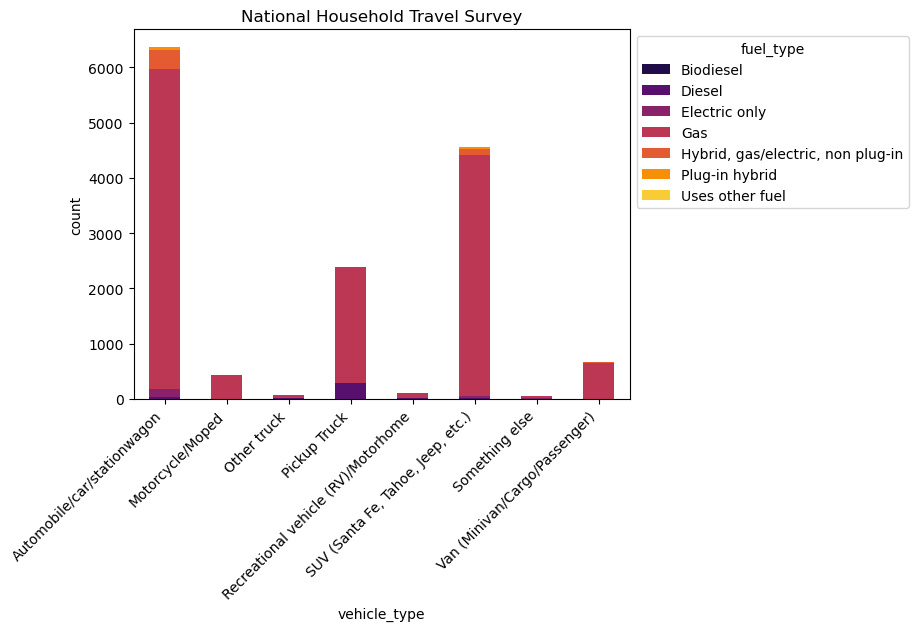

In [2]:
# Remove NA values in the 'make' column
nhts_data = nhts_data.dropna(subset=['vehicle_type'])

# Group data by 'make', 'vehicle_type', 'fuel_type', and 'vehicle_year'
#data_grouped = nhts_data.groupby(['make', 'vehicle_type', 'fuel_type', 'vehicle_year']).size().unstack(fill_value=0)

# Plot stacked bar chart
#data_grouped.plot(kind='bar', stacked=True, colormap='viridis')
nhts_data = nhts_data.dropna(subset=['vehicle_type']) #this line of code removes NA value in the make column

data_grouped = nhts_data.groupby(['vehicle_type', 'fuel_type']).size().unstack(fill_value=0)

plt.figure(figsize=(20,10))

data_grouped.plot(kind='bar', stacked=True, color = sns.color_palette('inferno', len(data_grouped.columns)))


plt.xlabel('vehicle_type')
plt.ylabel('count')
plt.title('National Household Travel Survey')
plt.xticks(rotation=45)

plt.xticks(rotation=45, ha='right') # spacing out data for readability on x axis

plt.legend(title = 'fuel_type', bbox_to_anchor = (1,1), loc= 'upper left')

#plt.legend(title = 'fuel_type', bbox_to_anchor = (1,1), loc= 'down left') # added for more display
#plt.legend(title = 'vehicle_year', bbox_to_anchor = (1,1), loc= 'down left') # added for more display
 
plt.tight_layout 
plt.show()

# Stacked Bar chart (do we need this?)

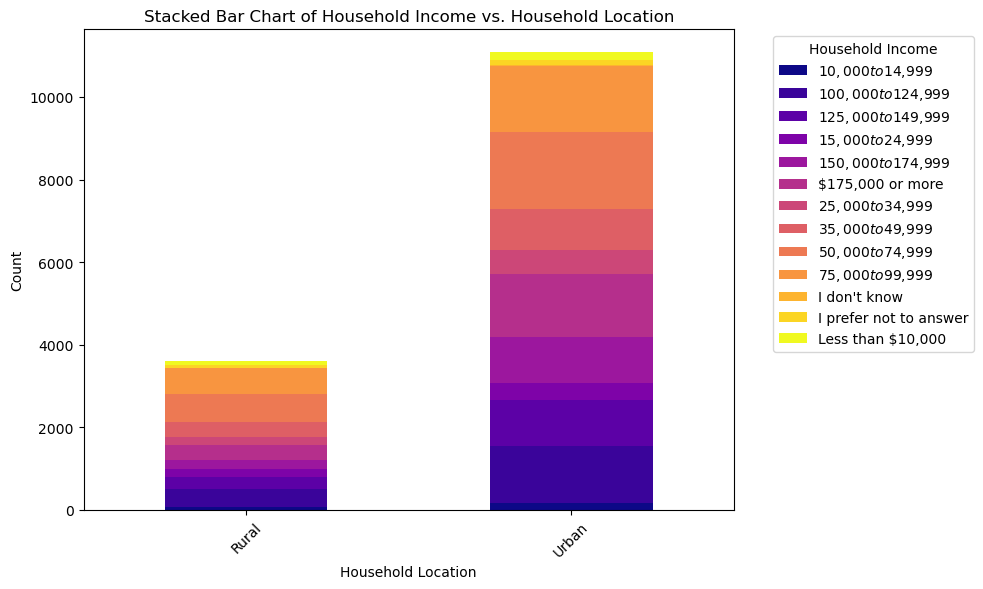

In [3]:
# Create a pivot table for stacking
stacked_data = nhts_data.pivot_table(index="household_location", columns="household_income", aggfunc="size", fill_value=0)

# Plot stacked bar chart
stacked_data.plot(kind="bar", stacked=True, figsize=(10, 6), colormap="plasma")

plt.title("Stacked Bar Chart of Household Income vs. Household Location")
plt.xlabel("Household Location")
plt.ylabel("Count")
plt.legend(title="Household Income", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Histogram showing Vehicle Year Distribution

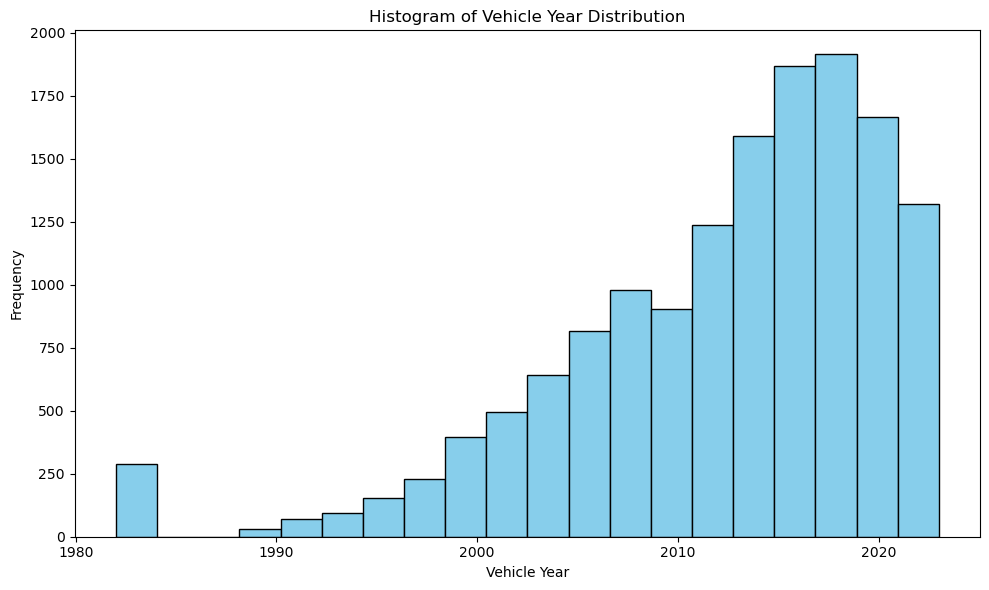

In [4]:
# Drop rows where 'vehicle_year' is missing
nhts_data = nhts_data.dropna(subset=["vehicle_year"])

# Convert 'vehicle_year' to numeric, forcing errors to NaN
nhts_data["vehicle_year"] = pd.to_numeric(nhts_data["vehicle_year"], errors="coerce")

# Drop rows where conversion failed (i.e., NaN values after conversion)
nhts_data = nhts_data.dropna(subset=["vehicle_year"])

# Plot the histogram for vehicle year distribution
plt.figure(figsize=(10, 6))
plt.hist(nhts_data["vehicle_year"], bins=20, color='skyblue', edgecolor='black')

# Add title and labels
plt.title("Histogram of Vehicle Year Distribution")
plt.xlabel("Vehicle Year")
plt.ylabel("Frequency")

# Show the plot
plt.tight_layout()
plt.show()


# Bar Chart of Vehicle Type vs. Vehicle Year

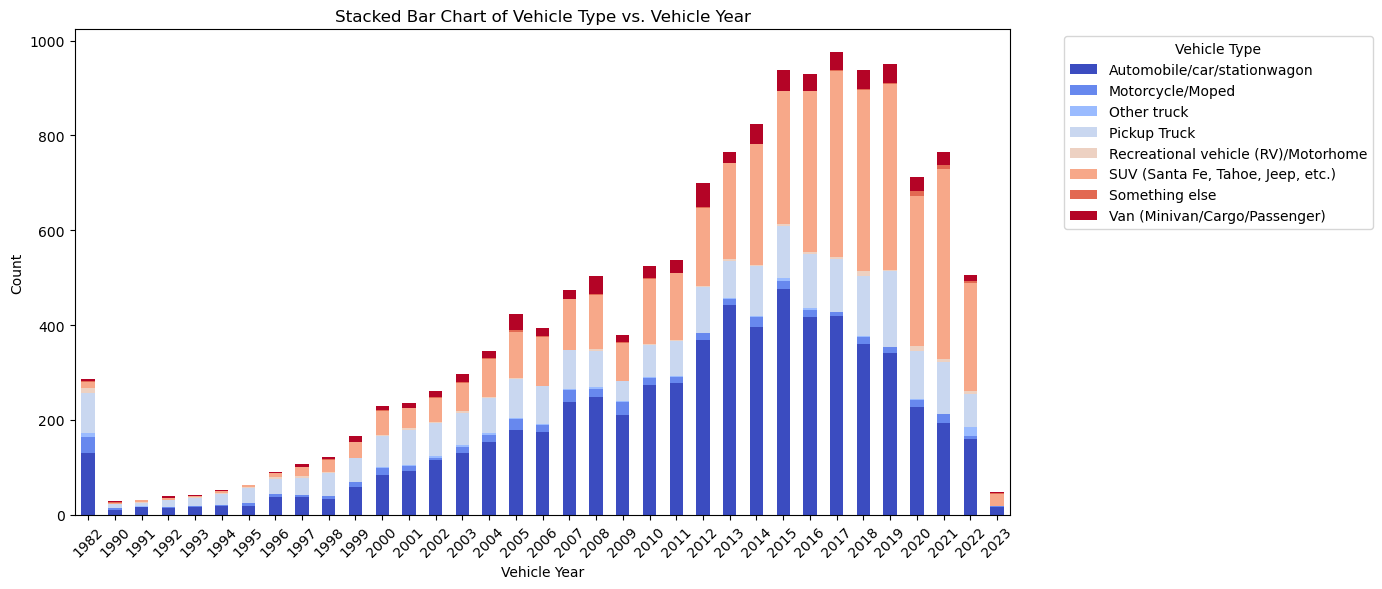

In [5]:
# Drop rows where 'vehicle_year' or 'vehicle_type' is missing
nhts_data = nhts_data.dropna(subset=["vehicle_year", "vehicle_type"])

# Convert 'vehicle_year' to numeric, forcing errors to NaN
nhts_data["vehicle_year"] = pd.to_numeric(nhts_data["vehicle_year"], errors="coerce")

# Drop rows where conversion failed (i.e., NaN values after conversion)
nhts_data = nhts_data.dropna(subset=["vehicle_year"])

# Convert vehicle_year to int after cleaning
nhts_data["vehicle_year"] = nhts_data["vehicle_year"].astype(int)

# Ensure there are not too many unique vehicle types (limit to top 10)
top_vehicle_types = nhts_data["vehicle_type"].value_counts().nlargest(10).index
nhts_data = nhts_data[nhts_data["vehicle_type"].isin(top_vehicle_types)]

# Create a pivot table for stacking
stacked_data = nhts_data.pivot_table(index="vehicle_year", columns="vehicle_type", aggfunc="size", fill_value=0)

# Check if the pivot table is empty before plotting
if stacked_data.empty:
    print("⚠️ Pivot table is empty!")
else:
    # Plot stacked bar chart
    stacked_data.plot(kind="bar", stacked=True, figsize=(14, 6), colormap="coolwarm")

    plt.title("Stacked Bar Chart of Vehicle Type vs. Vehicle Year")
    plt.xlabel("Vehicle Year")
    plt.ylabel("Count")
    plt.legend(title="Vehicle Type", bbox_to_anchor=(1.05, 1), loc="upper left")
    plt.xticks(rotation=45)  # Rotate for better readability
    plt.tight_layout()
    plt.show()

# Boxplot showing distribution of Vehicle Age by Household Income

<Figure size 1200x600 with 0 Axes>

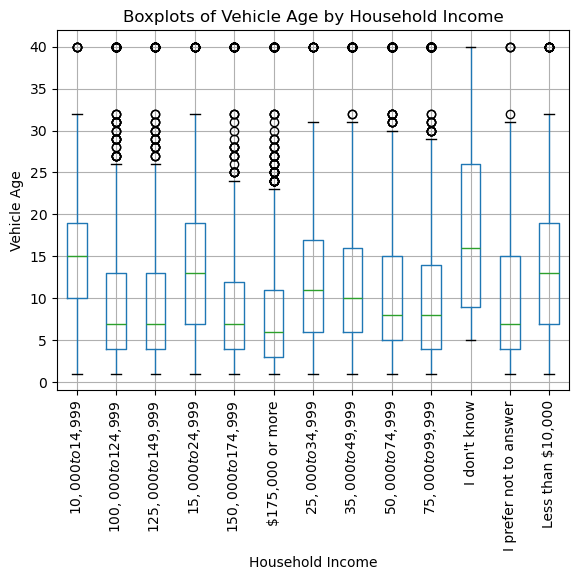

In [6]:
plt.figure(figsize=(12,6))

boxplot = nhts_data.boxplot(column='vehicle_age', by='household_income')

plt.xticks(rotation=90)

plt.xlabel('Household Income')
plt.ylabel('Vehicle Age')

plt.title('Boxplots of Vehicle Age by Household Income')


plt.suptitle('')
plt.show()

# Time Series plot by day of the year

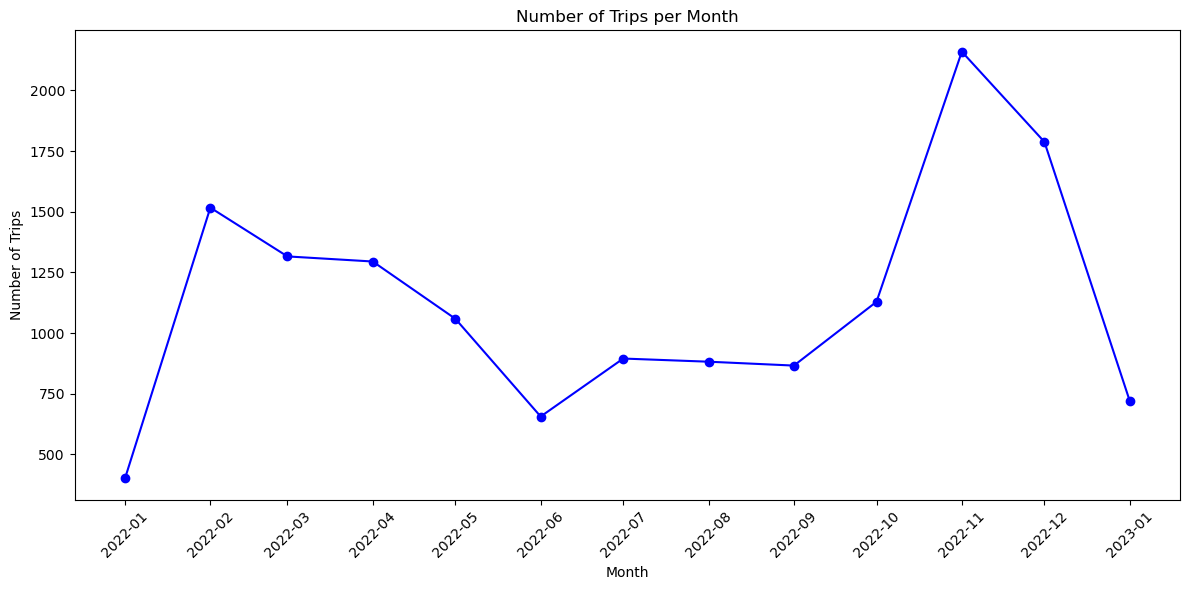

In [7]:
# Load the dataset
nhts_data = pd.read_csv('NHTS.csv')

# convert YYYYMM format to datetime
if not pd.api.types.is_datetime64_any_dtype(nhts_data['travel_date']):
    nhts_data['travel_date'] = pd.to_datetime(nhts_data['travel_date'].astype(str), format='%Y%m')

#  Group by 'travel_date' to count the total number of trips per month
trips_per_month = nhts_data.groupby('travel_date').size().sort_index()

# Create the plot
plt.figure(figsize=(12, 6))
plt.plot(trips_per_month.index, trips_per_month.values, color='blue', marker='o')

# Format x-axis 
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())  # Tick every month
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))  # Display as 'YYYY-MM'
plt.xticks(rotation=45)  # Rotate labels for clarity

# Labels and title
plt.xlabel('Month')
plt.ylabel('Number of Trips')
plt.title('Number of Trips per Month')

# Adjust layout
plt.tight_layout()
plt.show()

# Time series plot representing Trips by Day of the Week

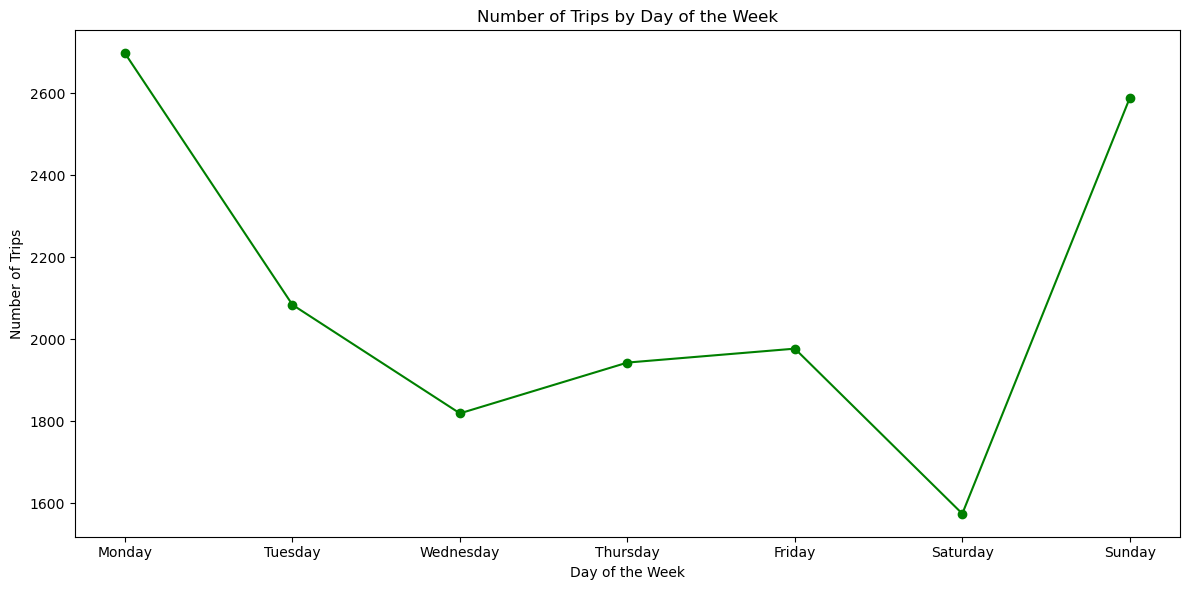

In [8]:
# Extract day of the week
nhts_data['day_of_week'] = nhts_data['travel_date'].dt.day_name()

# Define the order of days
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
nhts_data['day_of_week'] = pd.Categorical(nhts_data['travel_day'], categories=days_order, ordered=True)

# Group by day_of_week and household_id to count trips
trips_per_day = nhts_data.groupby(['day_of_week', 'household_id'], observed=False).size().reset_index(name='trips')

# Calculate average trips per day of the week
avg_trips_per_day = trips_per_day.groupby('day_of_week', observed=False)['trips'].sum()

# Create the plot
plt.figure(figsize=(12, 6))
plt.plot(avg_trips_per_day.index, avg_trips_per_day.values, color='green', marker='o')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Trips')
plt.title('Number of Trips by Day of the Week')
plt.tight_layout()
plt.show()


In [12]:
ngsim_data= pd.read_csv('NGSIM.csv')
print('Columns in dataset:', ngsim_data.columns)
print('Dataset Info')

# Print the dataset and show its attributes
print (ngsim_data.info())




Columns in dataset: Index(['Time', 'leader_position(m)', 'follower_position(m)',
       'leader_speed(m/s)', 'follower_speed(m/s)', 'leader_acc(m/s^2)',
       'follower_acc(m/s^2)', 'trajectory_number'],
      dtype='object')
Dataset Info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8166 entries, 0 to 8165
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Time                  8166 non-null   float64
 1   leader_position(m)    8166 non-null   float64
 2   follower_position(m)  8166 non-null   float64
 3   leader_speed(m/s)     8166 non-null   float64
 4   follower_speed(m/s)   8166 non-null   float64
 5   leader_acc(m/s^2)     8166 non-null   float64
 6   follower_acc(m/s^2)   8166 non-null   float64
 7   trajectory_number     8166 non-null   int64  
dtypes: float64(7), int64(1)
memory usage: 510.5 KB
None


/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<function matplotlib.pyplot.show(close=None, block=None)>

<Figure size 1000x500 with 0 Axes>

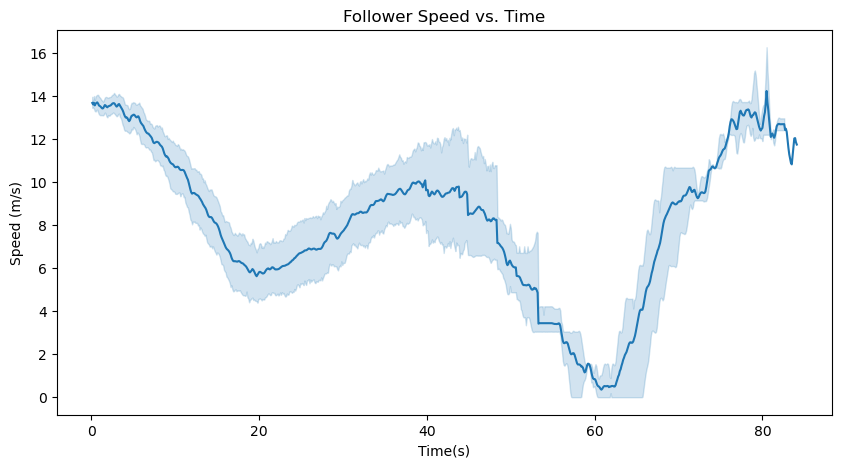

In [13]:
plt.figure(figsize=(10,5))
plt.figure(figsize=(10,5))
sns.lineplot(x= ngsim_data['Time'], y= ngsim_data['follower_speed(m/s)'])
plt.xlabel('Time(s)')
plt.ylabel('Speed (m/s)')
plt.title('Follower Speed vs. Time')
plt.show

/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<function matplotlib.pyplot.show(close=None, block=None)>

<Figure size 1000x500 with 0 Axes>

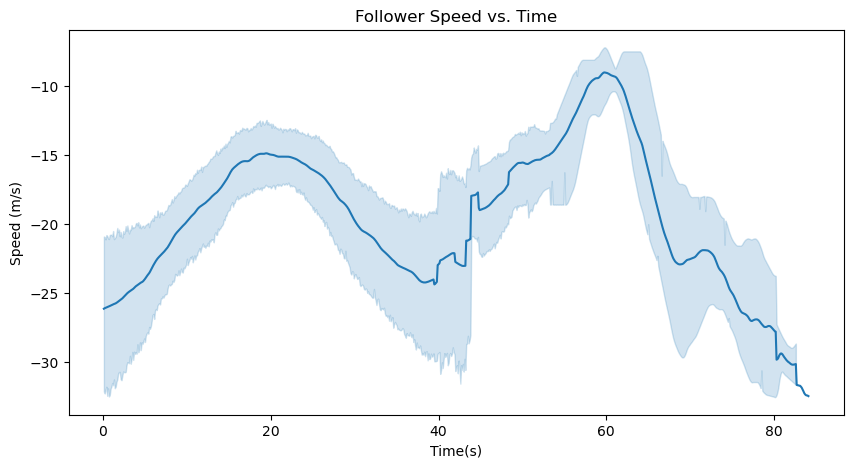

In [14]:
plt.figure(figsize=(10,5))
plt.figure(figsize=(10,5))
sns.lineplot(x= ngsim_data['Time'], y= ngsim_data['follower_position(m)']- ngsim_data['leader_position(m)'])
plt.xlabel('Time(s)')
plt.ylabel('Speed (m/s)')
plt.title('Follower Speed vs. Time')
plt.show